# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Farah Aulia Sahirah
- **Email:** farah.aulia.sahirah-2021@ftmm.unair.ac.id
- **ID Dicoding:** farah_aulia_sahirah_mKNq

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: pada hari apa biasanya peminjaman sepeda banyak dilakukan?

- Pertanyaan 2: pada musim dan situasi cuaca biasanya sepeda dipinjam, baik dengan orang yang sudah terdaftar membership atau belum?

## Import Semua Packages/Library yang Digunakan

In [183]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
!gdown https://drive.google.com/uc?id=1Abcv76bSmOxzsIx8TkbZ1i70FfFfzN4Q # import dataset
!unzip /content/Bike-sharing-dataset.zip
!rm /content/Bike-sharing-dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1Abcv76bSmOxzsIx8TkbZ1i70FfFfzN4Q
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 99.4MB/s]
Archive:  /content/Bike-sharing-dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: b
error:  invalid response [b]
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Data Wrangling

### Gathering Data

#### days

In [185]:
days_df = pd.read_csv("/content/day.csv") #import data days
days_df.head() #print 5 data pertama dari data days

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### hours

In [186]:
hours_df = pd.read_csv("/content/hour.csv") #import data hours
hours_df.head() #print 5 data pertama dari data hours

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### days

In [187]:
days_df.info() #mencari tahu tipe data dari kolom dataset days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [188]:
days_df.isna().sum() #mencari tahu apakah ada missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [189]:
print("Jumlah duplikasi: ", days_df.duplicated().sum()) #mencari tahu apakah ada data duplikat

Jumlah duplikasi:  0


In [190]:
days_df.describe() #memeriksa parameter statistik dari kolom numerik

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [191]:
days_df.nunique() #menghitung jumlah nilai unik di setiap kolom

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### hours

In [192]:
hours_df.info() #mencari tahu tipe data dari kolom dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [193]:
print("Jumlah duplikasi: ",hours_df.duplicated().sum()) #mencari tahu apakah ada data duplikat
hours_df.describe() #memeriksa parameter statistik dari kolom numerik

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [194]:
hours_df.isna().sum() #mencari tahu apakah ada missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [195]:
# tidak terdapat data yang mengandung missing value, invalid value,
# duplicate data, inaccurate value, inconsistent value, dan outlier
# pada kedua data csv.

## Exploratory Data Analysis (EDA)

### Explore ...

In [196]:
days_df.describe(include="all") #melihat rangkuman parameter statistik

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [197]:
days_df.groupby(by="season").agg({         #pengelompokan dan agregasi data days_df berdasarkan kolom season
    "instant": "nunique",
    "yr": ["max", "min", "mean", "std"],
    "mnth": ["max", "min", "mean", "std"]
})

instant  yr                         mnth                         
       nunique max min      mean       std  max min       mean       std
season                                                                  
1          181   1   0  0.502762  0.501379   12   1   3.093923  3.403759
2          184   1   0  0.500000  0.501364    6   3   4.652174  0.951671
3          188   1   0  0.500000  0.501335    9   6   7.691489  0.948137
4          178   1   0  0.500000  0.501410   12   9  10.696629  0.919402

In [198]:
datakedua = days_df.groupby(by=["season", "weathersit"]).agg({      #pengelompokan data days_df berdasarkan kolom season dan weathersit
    "registered": "sum",
    "casual": "sum"
})
print(datakedua)

                   registered  casual
season weathersit                    
1      1               270474   41562
       2               136794   18779
       3                 3458     281
2      1               480598  146388
       2               231382   56714
       3                 3087     420
3      1               631498  167945
       2               194272   56407
       3                 9268    1739
4      1               429036   90451
       2               264634   37876
       3                18161    1455


In [199]:
print(days_df['weathersit'])  #untuk mengetahui isi kolom weathersit

0      2
1      2
2      1
3      1
4      1
      ..
726    2
727    2
728    2
729    1
730    2
Name: weathersit, Length: 731, dtype: int64


In [200]:
weekday = days_df.groupby("weekday").agg({        #pengelompokan dan agregasi data days_df berdasarkan nilai unik dalam kolom weekday
    "cnt": "sum"
})
print(weekday)

            cnt
weekday        
0        444027
1        455503
2        469109
3        473048
4        485395
5        487790
6        477807


## Visualization & Explanatory Analysis

### Pertanyaan 1:

##### pada hari apa biasanya peminjaman sepeda banyak dilakukan?

<ipython-input-201-86ad0411d0fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(    #membuat diagram bar dengan seaborn


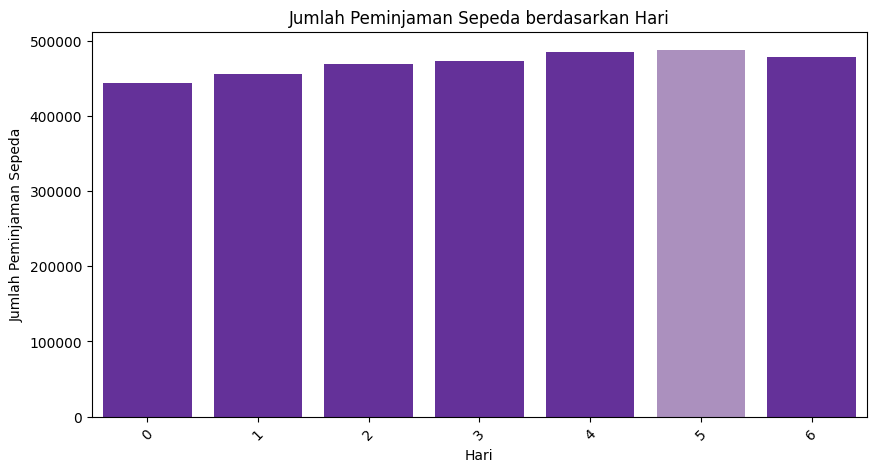

In [201]:
max_index = weekday["cnt"].idxmax() #untuk menentukan indeks nilai maks dari kolom cnt
colors = ['#6420AA' if i != max_index else '#AD88C6' for i in range(len(weekday))] # membuat daftar warna untuk setiap diagram batang

plt.figure(figsize=(10, 5)) #membuat figure

sns.barplot(    #membuat diagram bar dengan seaborn
    x="weekday",
    y="cnt",
    data=weekday,
    palette=colors
)

plt.title("Jumlah Peminjaman Sepeda berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

##### pada musim dan situasi cuaca  biasanya sepeda dipinjam, baik dengan orang yang sudah terdaftar membership atau belum?

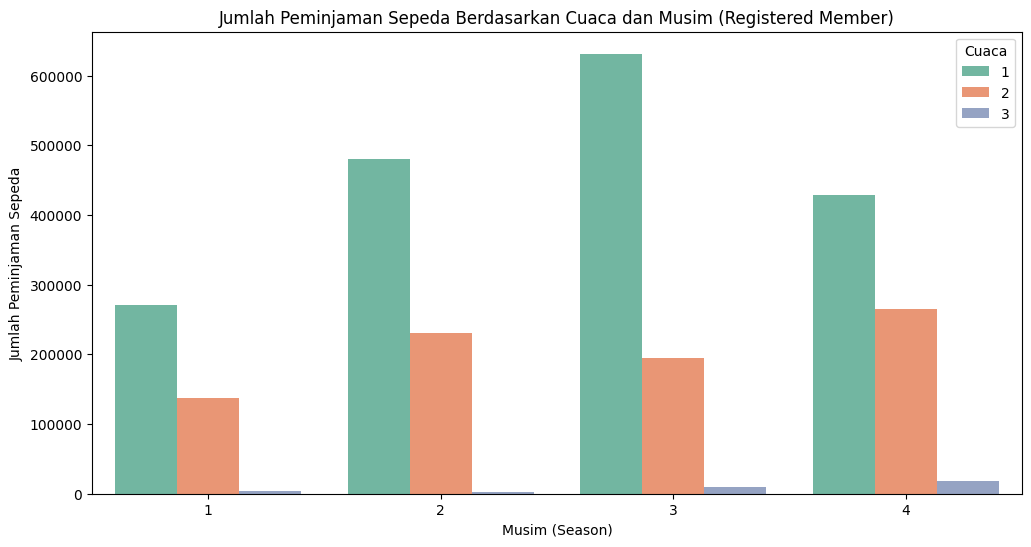

In [202]:
datakedua.rename(columns={        #mengubah nama kolom
    "registered": "Registered",
    "casual": "Casual"
}, inplace=True)

plt.figure(figsize=(12, 6))   #membuat figure

sns.barplot(        #membuat diagram bar dengan seaborn
    x="season",
    y="Registered",
    hue="weathersit",
    data=datakedua,
    palette="Set2"
)

plt.title("Jumlah Peminjaman Sepeda Berdasarkan Cuaca dan Musim (Registered Member)")
plt.xlabel("Musim (Season)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.legend(title="Cuaca")
plt.show()

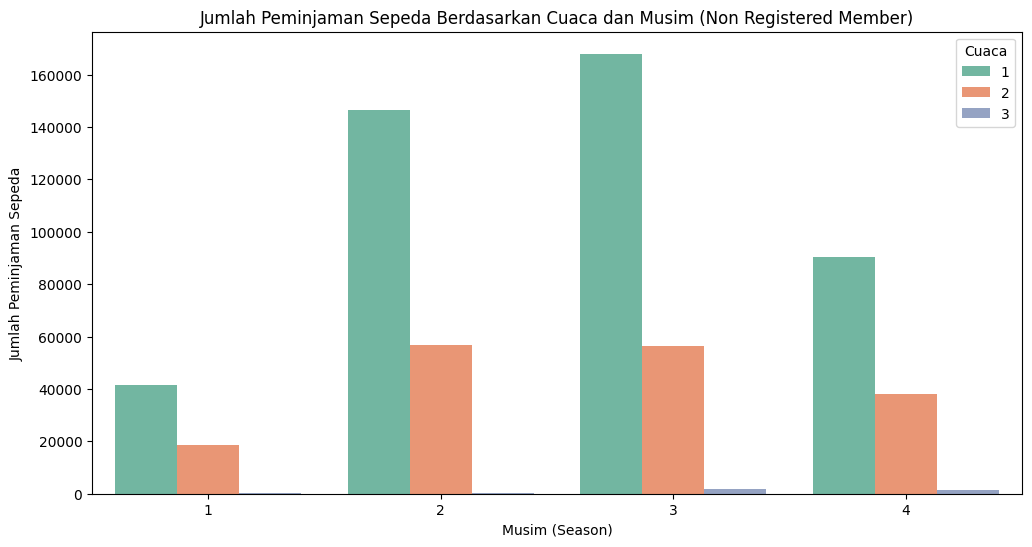

In [203]:
datakedua.rename(columns={          #mengubah nama kolom
    "registered": "Registered",
    "casual": "Casual"
}, inplace=True)

plt.figure(figsize=(12, 6))   #membuat figure

sns.barplot(          #membuat diagram bar dengan seaborn
    x="season",
    y="Casual",
    hue="weathersit",
    data=datakedua,
    palette="Set2"
)

plt.title("Jumlah Peminjaman Sepeda Berdasarkan Cuaca dan Musim (Non Registered Member)")
plt.xlabel("Musim (Season)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.legend(title="Cuaca")
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

In [204]:
# Pertanyaan 1:
'''
  Pada hari apa biasanya peminjaman sepeda banyak dilakukan?

  -> Berdasarkan data, terlihat bahwa indeks 5 (hari Jumat) memiliki jumlah pelanggan yang lebih banyak dibandingkan dengan yang lain.
     Sedangkan hari minggu (0) memiliki jumlah pelanggan terdikit.
  Keterangan:
     Indeks 0 menunjukkan hari minggu.
     Indeks 1 menunjukkan hari senin.
     Indeks 2 menunjukkan hari selasa.
     Indeks 3 menunjukkan hari rabu.
     Indeks 4 menunjukkan hari kamis.
     Indeks 5 menunjukkan hari jumat.
     Indeks 6 menunjukkan hari sabtu.
'''

# Pertanyaan 2:
'''
  Pada musim dan situasi cuaca apa biasanya sepeda dipinjam?
  Baik dengan orang yang sudah terdaftar membership atau belum?

  -> Peminjaman terbanyak terjadi saat musim gugur (Fall dengan indeks 3) dan
     saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy (indeks 1) untuk registered member maupun non registered member.
     Sedangkan peminjaman sedikit terjadi saat cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (indeks 3).
     Begitu pula dengan indeks 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) dimana tidak ada sama sekali yang meminjam sepeda.
     Hal tersebut berlaku pada kedua jenis pelanggan yaitu registered member dan non registered member.
     Jika menurut musim, peminjaman sepeda terdikit untuk registered member dan non registered member terjadi saat musim semi (Springer, indeks 1).
'''

'\n  Pada musim dan situasi cuaca apa biasanya sepeda dipinjam?\n  Baik dengan orang yang sudah terdaftar membership atau belum?\n\n  -> Peminjaman terbanyak terjadi saat musim gugur (Fall dengan indeks 3) dan\n     saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy (indeks 1) untuk registered member maupun non registered member.\n     Sedangkan peminjaman sedikit terjadi saat cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (indeks 3).\n     Begitu pula dengan indeks 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) dimana tidak ada sama sekali yang meminjam sepeda.\n     Hal tersebut berlaku pada kedua jenis pelanggan yaitu registered member dan non registered member.\n     Jika menurut musim, peminjaman sepeda terdikit untuk registered member dan non registered member terjadi saat musim semi (Springer, indeks 1).\n'

In [205]:
days_df.to_csv("all_data.csv", index=False)